In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from _config import PATH_RAW_DTU_SOLAR_STATION

In [72]:
# Get all CSV files in the path folder
csv_files = list(PATH_RAW_DTU_SOLAR_STATION.glob("*.csv"))

# Read each CSV file and combine them into a single DataFrame
dfs = [pd.read_csv(f) for f in csv_files]
df = pd.concat(dfs, ignore_index=True)
df.set_index('Time(utc)', inplace=True)
df.index = pd.to_datetime(df.index)

# Add missing indexes to the period (columns will be filled with NaN values.)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1min")
df = df.reindex(full_range)
df.sort_index(inplace=True)
df_raw = df.copy()

df.head()

,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity
2015-01-01 00:00:00,0.000325,NaN,-0.000002,NaN,5.0,278.0,4.8,1020.0,81.5,0.0,0.0,0.0
2015-01-01 00:01:00,NaN,NaN,NaN,NaN,4.7,264.0,4.8,1020.0,81.6,0.0,0.0,0.0
2015-01-01 00:02:00,NaN,NaN,NaN,NaN,3.3,269.0,4.8,1020.0,81.6,0.0,0.0,0.0
2015-01-01 00:03:00,NaN,NaN,NaN,NaN,3.6,247.0,4.8,1020.0,81.7,0.0,0.0,0.0
2015-01-01 00:04:00,NaN,NaN,NaN,NaN,2.2,228.0,4.8,1020.0,81.7,0.0,0.0,0.0


In [73]:
import pandas as pd

# Step 1: Get the complete time range
min_time = df.index.min()
max_time = df.index.max()
full_range = pd.date_range(start=min_time, end=max_time, freq="1min")

# Step 2: Identify missing timestamps
missing_timestamps = full_range.difference(df.index)

# Display results
if missing_timestamps.empty:
    print("No missing timestamps.")
else:
    print("Missing timestamps:")
    print(missing_timestamps)


No missing timestamps.


In [74]:
df.columns

Index(['GHI', 'DNI', 'DHI', 'LWD', 'wind_speed_avg', 'wind_dir_avg',
       'air_temperature', 'air_pressure', 'relative_humidity',
       'rain_accumulation', 'rain_duration', 'rain_intensity'],
      dtype='object')

In [75]:
display(df.describe().round(3), df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5260805 entries, 2015-01-01 00:00:00 to 2025-01-01 08:04:00
Freq: min
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   GHI                float64
 1   DNI                float64
 2   DHI                float64
 3   LWD                float64
 4   wind_speed_avg     float64
 5   wind_dir_avg       float64
 6   air_temperature    float64
 7   air_pressure       float64
 8   relative_humidity  float64
 9   rain_accumulation  float64
 10  rain_duration      float64
 11  rain_intensity     float64
dtypes: float64(12)
memory usage: 521.8 MB


,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity
count,5031319.000,4965446.000,4993921.000,3073445.000,5086375.000,5086375.000,5086013.000,5086203.000,5086203.000,4963979.000,4963979.000,4963979.000
mean,118.681,122.276,57.042,753.191,2.732,204.257,9.897,1007.485,73.333,0.001,1.953,0.065
std,207.283,261.393,92.284,9781.588,1.774,89.644,6.587,10.670,13.849,0.014,9.794,0.857
min,-9.758,-12.520,-23.610,-7.325,-0.980,-0.139,-10.100,958.200,12.200,-0.919,-0.946,-0.909
25%,-1.149,-0.303,-1.079,293.227,1.400,123.000,4.700,1001.000,64.900,0.000,0.000,0.000
50%,3.305,-0.006,3.613,324.874,2.400,231.000,9.500,1008.000,76.800,0.000,0.000,0.000
75%,149.400,8.135,83.760,349.682,3.700,274.000,15.000,1014.000,84.400,0.000,0.000,0.000
max,1690.000,1001.190,882.000,311300.000,26.700,359.000,31.600,1044.000,94.400,2.080,110.000,123.400


None

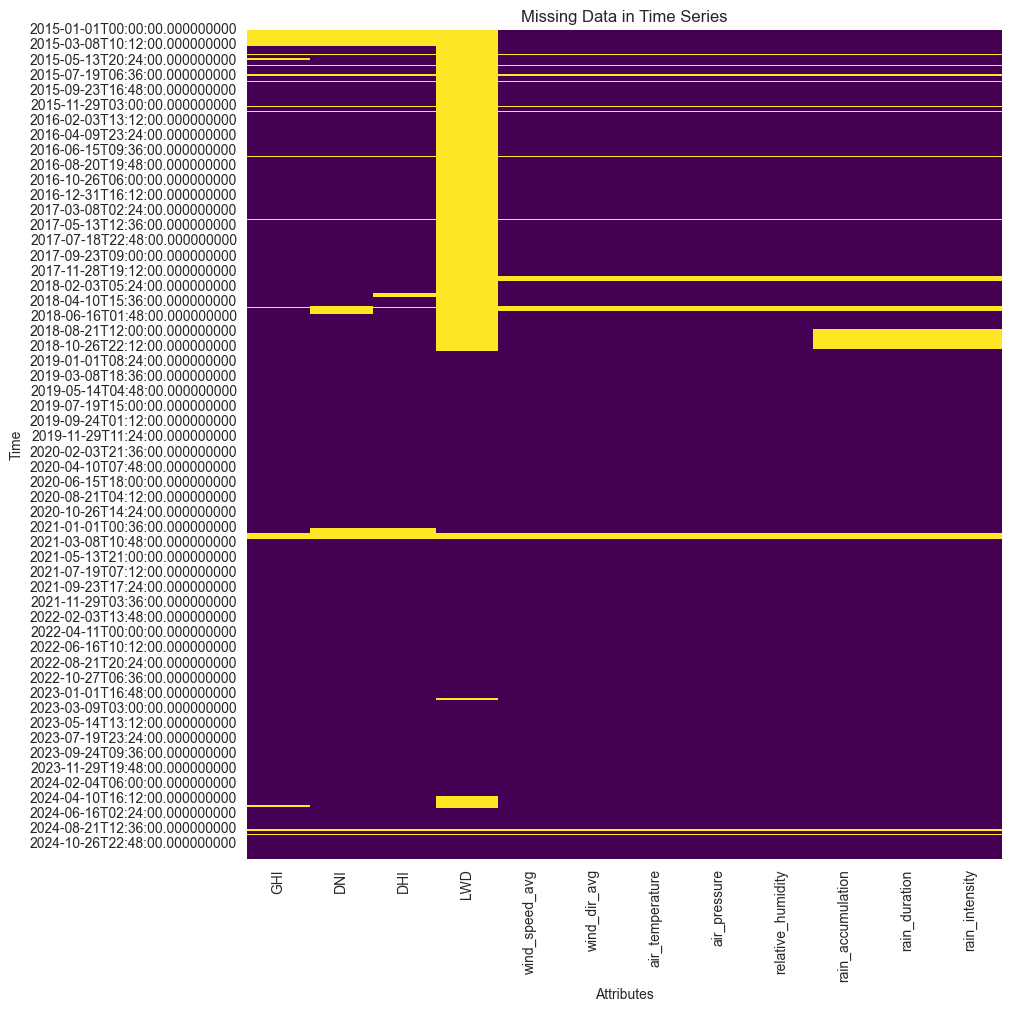

In [63]:
# Create a boolean DataFrame indicating where values are missing
missing_data = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 10), layout='constrained')
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data in Time Series')
plt.xlabel('Attributes')
plt.ylabel('Time')
# plt.savefig('./thesis_content/missing_data.png', dpi=100)
plt.show()

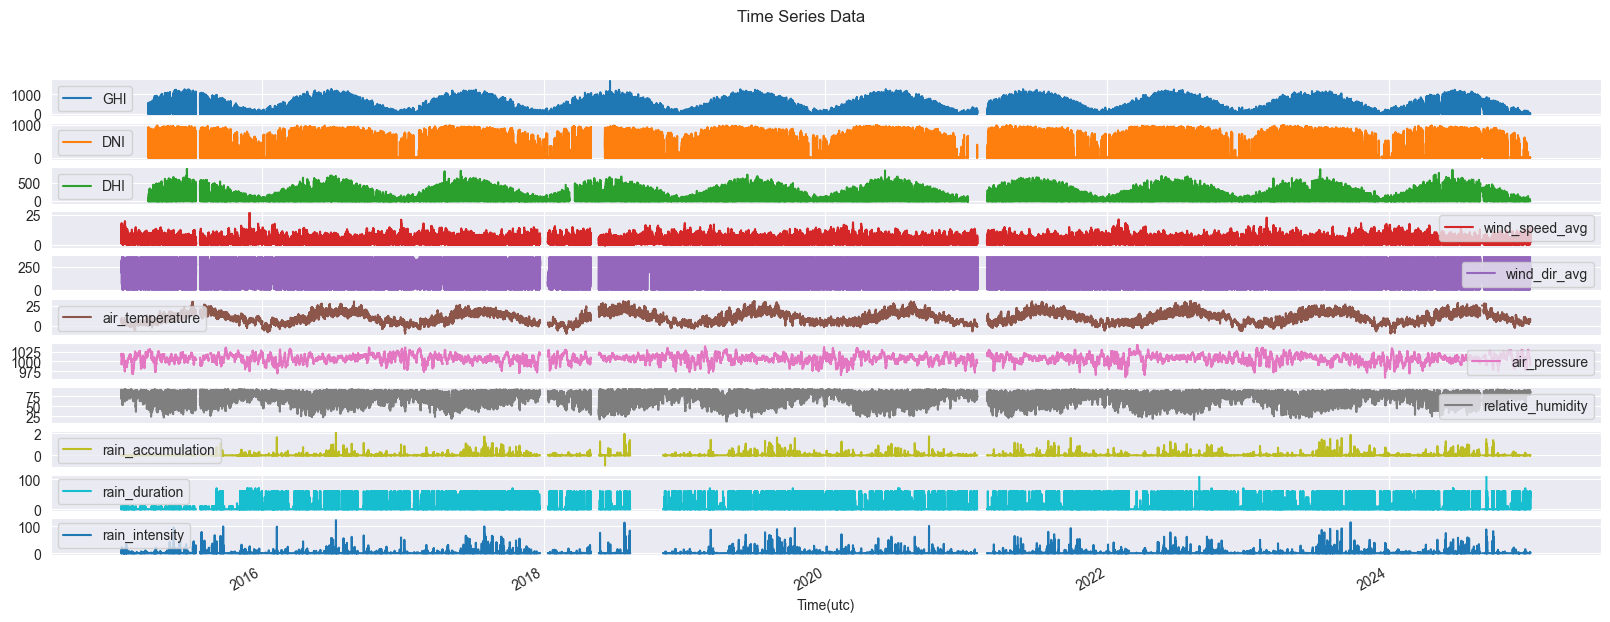

In [17]:
df.plot(figsize=(20, 7), title='Time Series Data', subplots=True)
# plt.savefig('./thesis_content/time_series_data.png', dpi=100)
plt.show()

Preprocess

In [105]:
df = df_raw.copy()
# We observed alot of missing values in LWD
df.drop(columns=['LWD'], inplace=True)

In [106]:
import numpy as np

df = df.copy()
# display(df.loc['2021-01-05'].head())
mask = (df.index > "2021-01-04") & (df.index < "2021-02-23")
df.loc[mask] = np.nan
# display(df.loc['2021-01-05'].head())

# display(df.loc['2015-03-11'].head())
mask = df.index < "2015-03-12"
df.loc[mask] = np.nan
# display(df.loc['2015-03-11'].head())

# display(df.loc['2018-11-05'].head())
mask = (df.index < "2018-11-07") & (df.index > "2018-08-12")
df.loc[mask] = np.nan
# display(df.loc['2018-11-05'].head())

In [107]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

def impute_nan_gaps(df):
    """
    Impute gaps (rows with any NaN values) in a timeseries DataFrame
    using different interpolation methods based on the gap length.

    For each gap that is "sandwiched" by valid (non-NaN) rows:
      - Gap length == 1: fill with the average of the previous and next valid rows.
      - Gap length 2 to 5: use linear interpolation.
      - Gap length 6 to 10: use polynomial interpolation (order 2).
          (If sufficient surrounding points are not available, fallback to linear.)
      - Gap length 11 to 15: use spline interpolation (order 2).
          (Again, if not enough valid surrounding points are available, fallback to linear.)
      - Gaps >15: leave the gap as-is.

    Parameters:
      df : pandas DataFrame with a timeseries index.

    Returns:
      df_imputed : a new DataFrame with the imputed values.
    """
    # Work on a copy to avoid modifying the original DataFrame.
    df_imputed = df.copy()

    # Create a boolean mask for rows with any NaN value.
    mask = df_imputed.isna().any(axis=1).values  # using .values for easy iteration

    # Identify contiguous gap groups (list of lists of integer positions)
    gap_groups = []
    current_group = []
    for i, is_nan in enumerate(mask):
        if is_nan:
            current_group.append(i)
        else:
            if current_group:
                gap_groups.append(current_group)
                current_group = []
    if current_group:
        gap_groups.append(current_group)

    # Process each gap group
    for group in gap_groups:
        gap_length = len(group)
        start = group[0]
        end = group[-1]
        # Ensure the gap is sandwiched by valid rows
        if start == 0 or end == len(df_imputed) - 1:
            continue
        # Skip gaps longer than 15 rows
        if gap_length > 15:
            df_imputed.iloc[start:end+1] = np.nan
            continue

        # Decide which interpolation method to use
        if gap_length == 1:
            method = 'average'
        elif 2 <= gap_length <= 5:
            method = 'linear'
        elif 6 <= gap_length <= 10:
            method = 'polynomial'
        elif 11 <= gap_length <= 15:
            method = 'spline'

        # Process each column separately.
        for col in df_imputed.columns:
            # Check if any row in this gap is missing for the column.
            # (It might be that only some columns are missing in the gap.)
            gap_vals = df_imputed.iloc[start:end+1][col]
            if not gap_vals.isna().any():
                continue  # nothing to fill for this column in this gap

            # Get the endpoint values (assumed valid) for this column.
            prev_val = df_imputed.iat[start - 1, df_imputed.columns.get_loc(col)]
            next_val = df_imputed.iat[end + 1, df_imputed.columns.get_loc(col)]
            if pd.isna(prev_val) or pd.isna(next_val):
                # Safety check: if either endpoint is missing, skip imputation for this gap/column.
                continue

            if method == 'average':
                # Gap length 1: fill with the average of the two endpoints.
                fill_val = (prev_val + next_val) / 2
                df_imputed.iat[start, df_imputed.columns.get_loc(col)] = fill_val

            elif method == 'linear':
                # Linear interpolation over the gap.
                # For each missing row j (0-indexed in the gap), compute:
                # interpolated_val = prev_val + (next_val - prev_val) * (j+1)/(gap_length+1)
                for j in range(gap_length):
                    interpolated_val = prev_val + (next_val - prev_val) * (j + 1) / (gap_length + 1)
                    df_imputed.iat[start + j, df_imputed.columns.get_loc(col)] = interpolated_val

            elif method == 'polynomial':
                # Attempt quadratic interpolation (order=2).
                # We need at least 3 points. We try to use:
                #   - the row two steps before the gap (if available)
                #   - the row immediately before the gap
                #   - the row immediately after the gap
                indices = []
                values = []
                if start - 2 >= 0:
                    indices.append(start - 2)
                    values.append(df_imputed.iat[start - 2, df_imputed.columns.get_loc(col)])
                # Always include the row immediately before the gap.
                indices.append(start - 1)
                values.append(prev_val)
                # Include the row immediately after the gap.
                indices.append(end + 1)
                values.append(next_val)

                # If any of these are missing, fallback to linear interpolation.
                if any(pd.isna(v) for v in values) or len(indices) < 3:
                    for j in range(gap_length):
                        interpolated_val = prev_val + (next_val - prev_val) * (j + 1) / (gap_length + 1)
                        df_imputed.iat[start + j, df_imputed.columns.get_loc(col)] = interpolated_val
                else:
                    # Fit a quadratic polynomial.
                    x = np.array(indices)
                    y = np.array(values)
                    coeffs = np.polyfit(x, y, 2)
                    poly = np.poly1d(coeffs)
                    # Fill in the gap rows by evaluating the polynomial at the corresponding positions.
                    for idx in range(start, end + 1):
                        df_imputed.iat[idx, df_imputed.columns.get_loc(col)] = poly(idx)

            elif method == 'spline':
                # Spline interpolation (order=2). We try to use two valid points before and after if possible.
                indices = []
                values = []
                if start - 2 >= 0:
                    indices.append(start - 2)
                    values.append(df_imputed.iat[start - 2, df_imputed.columns.get_loc(col)])
                if start - 1 >= 0:
                    indices.append(start - 1)
                    values.append(prev_val)
                if end + 1 < len(df_imputed):
                    indices.append(end + 1)
                    values.append(next_val)
                if end + 2 < len(df_imputed):
                    indices.append(end + 2)
                    values.append(df_imputed.iat[end + 2, df_imputed.columns.get_loc(col)])

                # We need at least 3 points for spline interpolation.
                if len(indices) < 3 or any(pd.isna(v) for v in values):
                    # Fallback to linear if not enough valid points.
                    for j in range(gap_length):
                        interpolated_val = prev_val + (next_val - prev_val) * (j + 1) / (gap_length + 1)
                        df_imputed.iat[start + j, df_imputed.columns.get_loc(col)] = interpolated_val
                else:
                    # Create a spline (k=2 for quadratic spline, s=0 forces interpolation).
                    x = np.array(indices)
                    y = np.array(values)
                    spline = UnivariateSpline(x, y, k=2, s=0)
                    for idx in range(start, end + 1):
                        df_imputed.iat[idx, df_imputed.columns.get_loc(col)] = spline(idx)



    return df_imputed

# Example usage:
# Suppose `df` is your timeseries DataFrame.
df = impute_nan_gaps(df)
# Now `imputed_df` has gaps imputed for gap sizes 1-15 using different techniques.


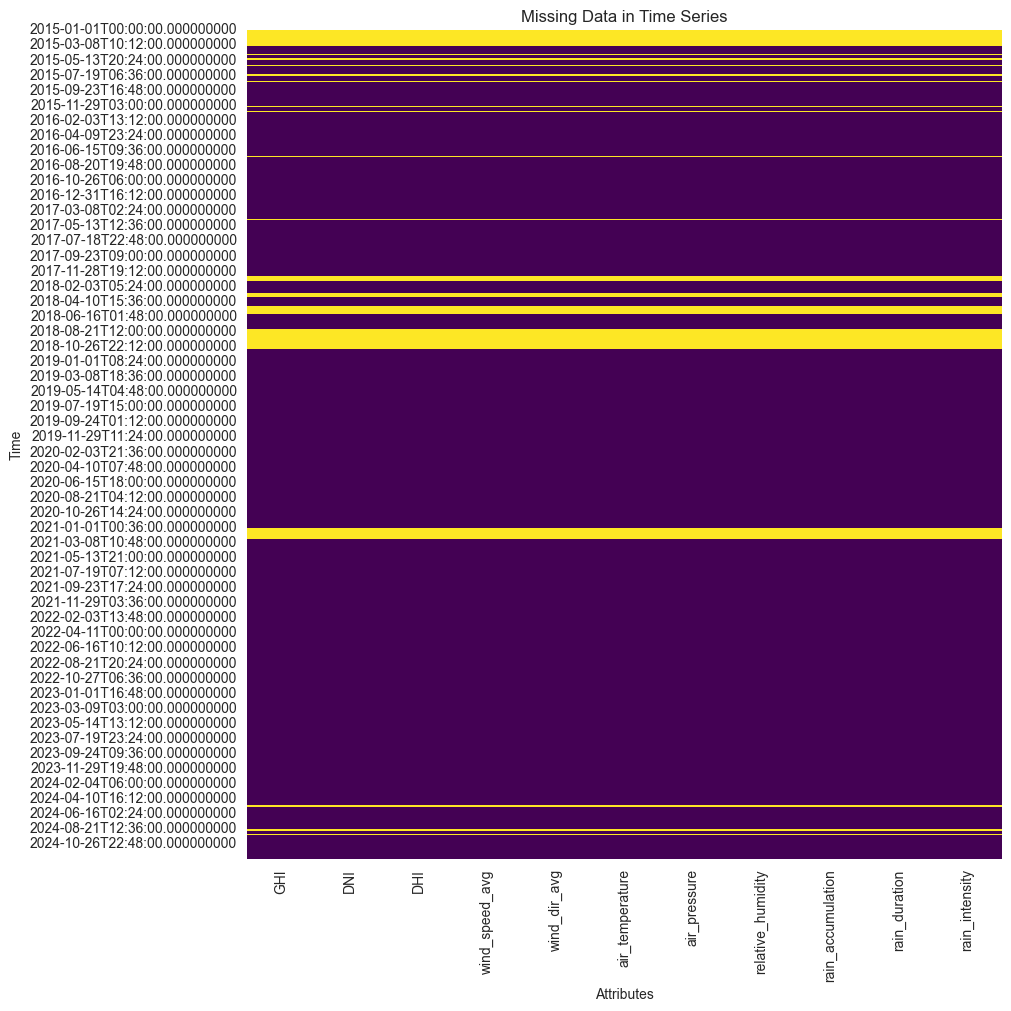

In [108]:
# Create a boolean DataFrame indicating where values are missing
missing_data = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 10), layout='constrained')
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data in Time Series')
plt.xlabel('Attributes')
plt.ylabel('Time')
# plt.savefig('./thesis_content/missing_data_preprocessed.png', dpi=100)
plt.show()

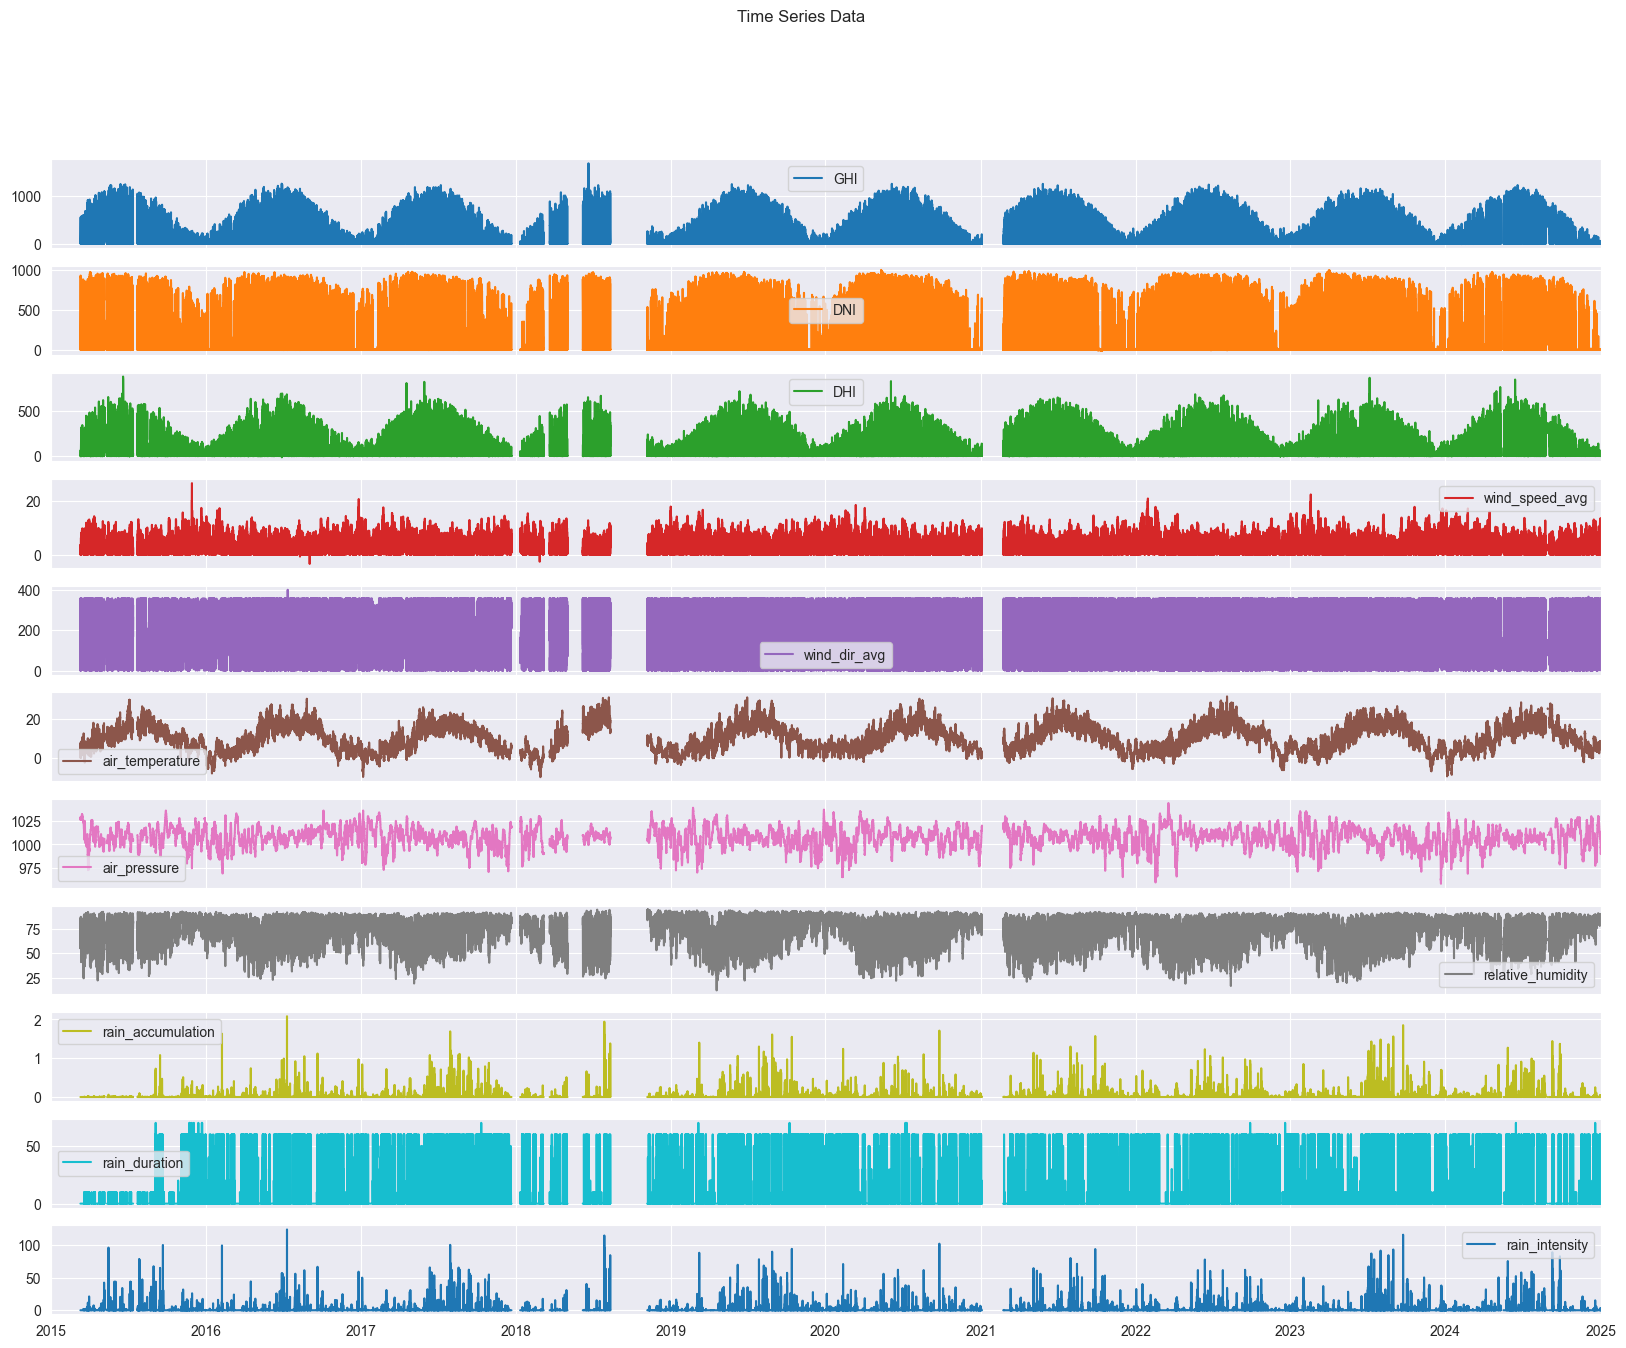

In [109]:
df.plot(figsize=(20, 15), title='Time Series Data', subplots=True)
# plt.savefig('./thesis_content/time_series_data.png', dpi=100)
plt.show()

Problems with specific period and extreme values on LWD:

In [7]:

column = 'DHI'
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for non-extreme values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme values (outliers)
df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)
# df_filtered[columnplot()

Original DataFrame shape: (5260320, 12)
Filtered DataFrame shape: (3027116, 12)


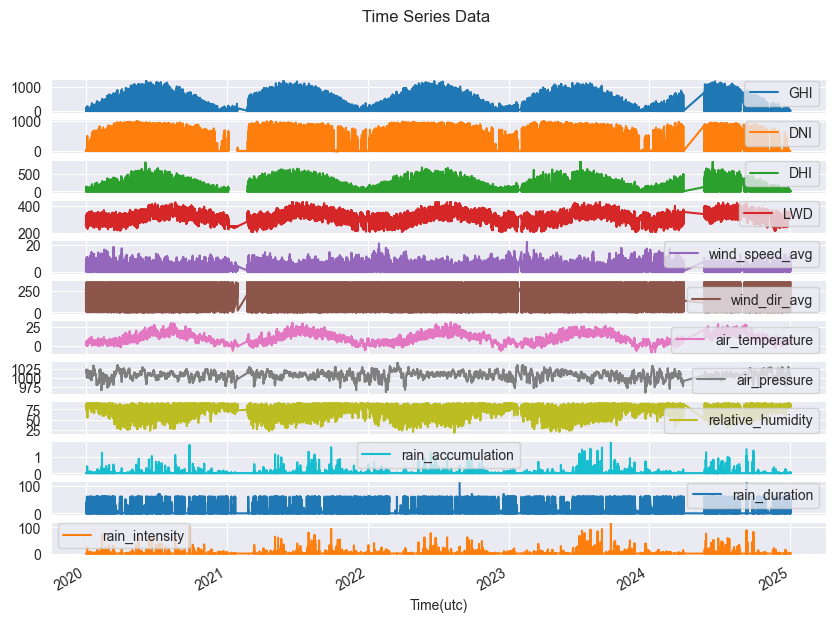

In [54]:
df_filtered.plot(figsize=(10, 7), title='Time Series Data', subplots=True)
plt.show()

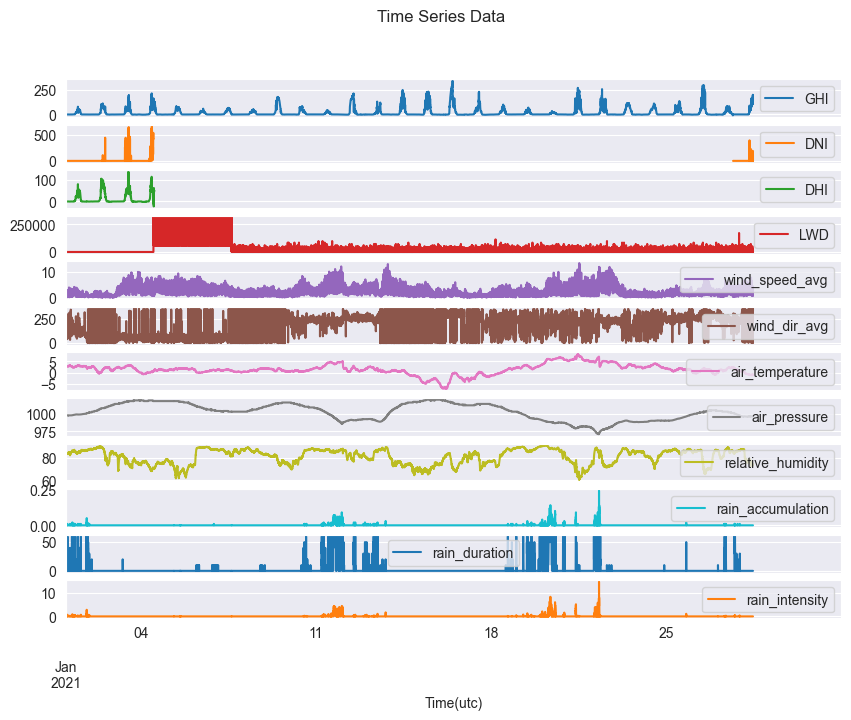

In [38]:
# Plotting the time series data
df.loc['2021-01'].plot(figsize=(10, 7), title='Time Series Data', subplots=True)
# plt.savefig('time_series_data_bad_2021-01.png', dpi=100)
plt.show()

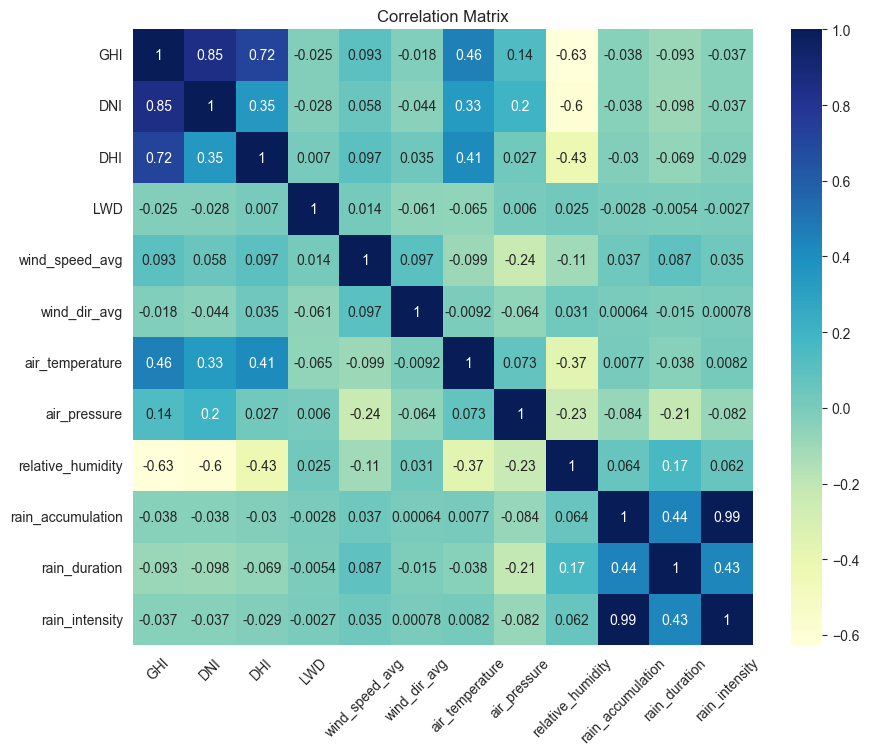

In [36]:
corr_std = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_std, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.savefig('correlation_matrix_raw.png', dpi=100)
plt.show()

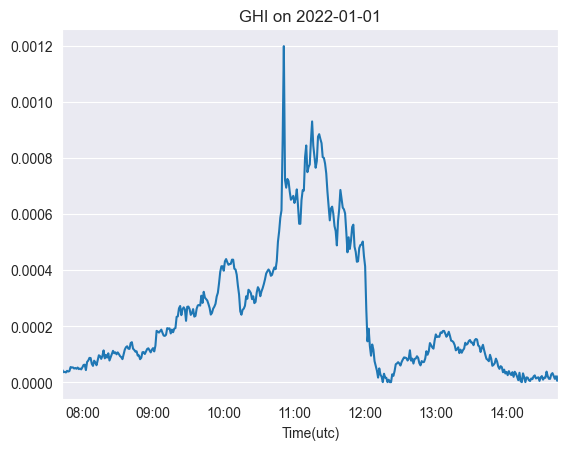

In [22]:
# select random date and plot the GHI
date = '2022-01-01'
df.loc[date, 'DNI'].plot()
plt.title(f'GHI on {date}')
plt.show()


datetime.date(2020, 4, 7)

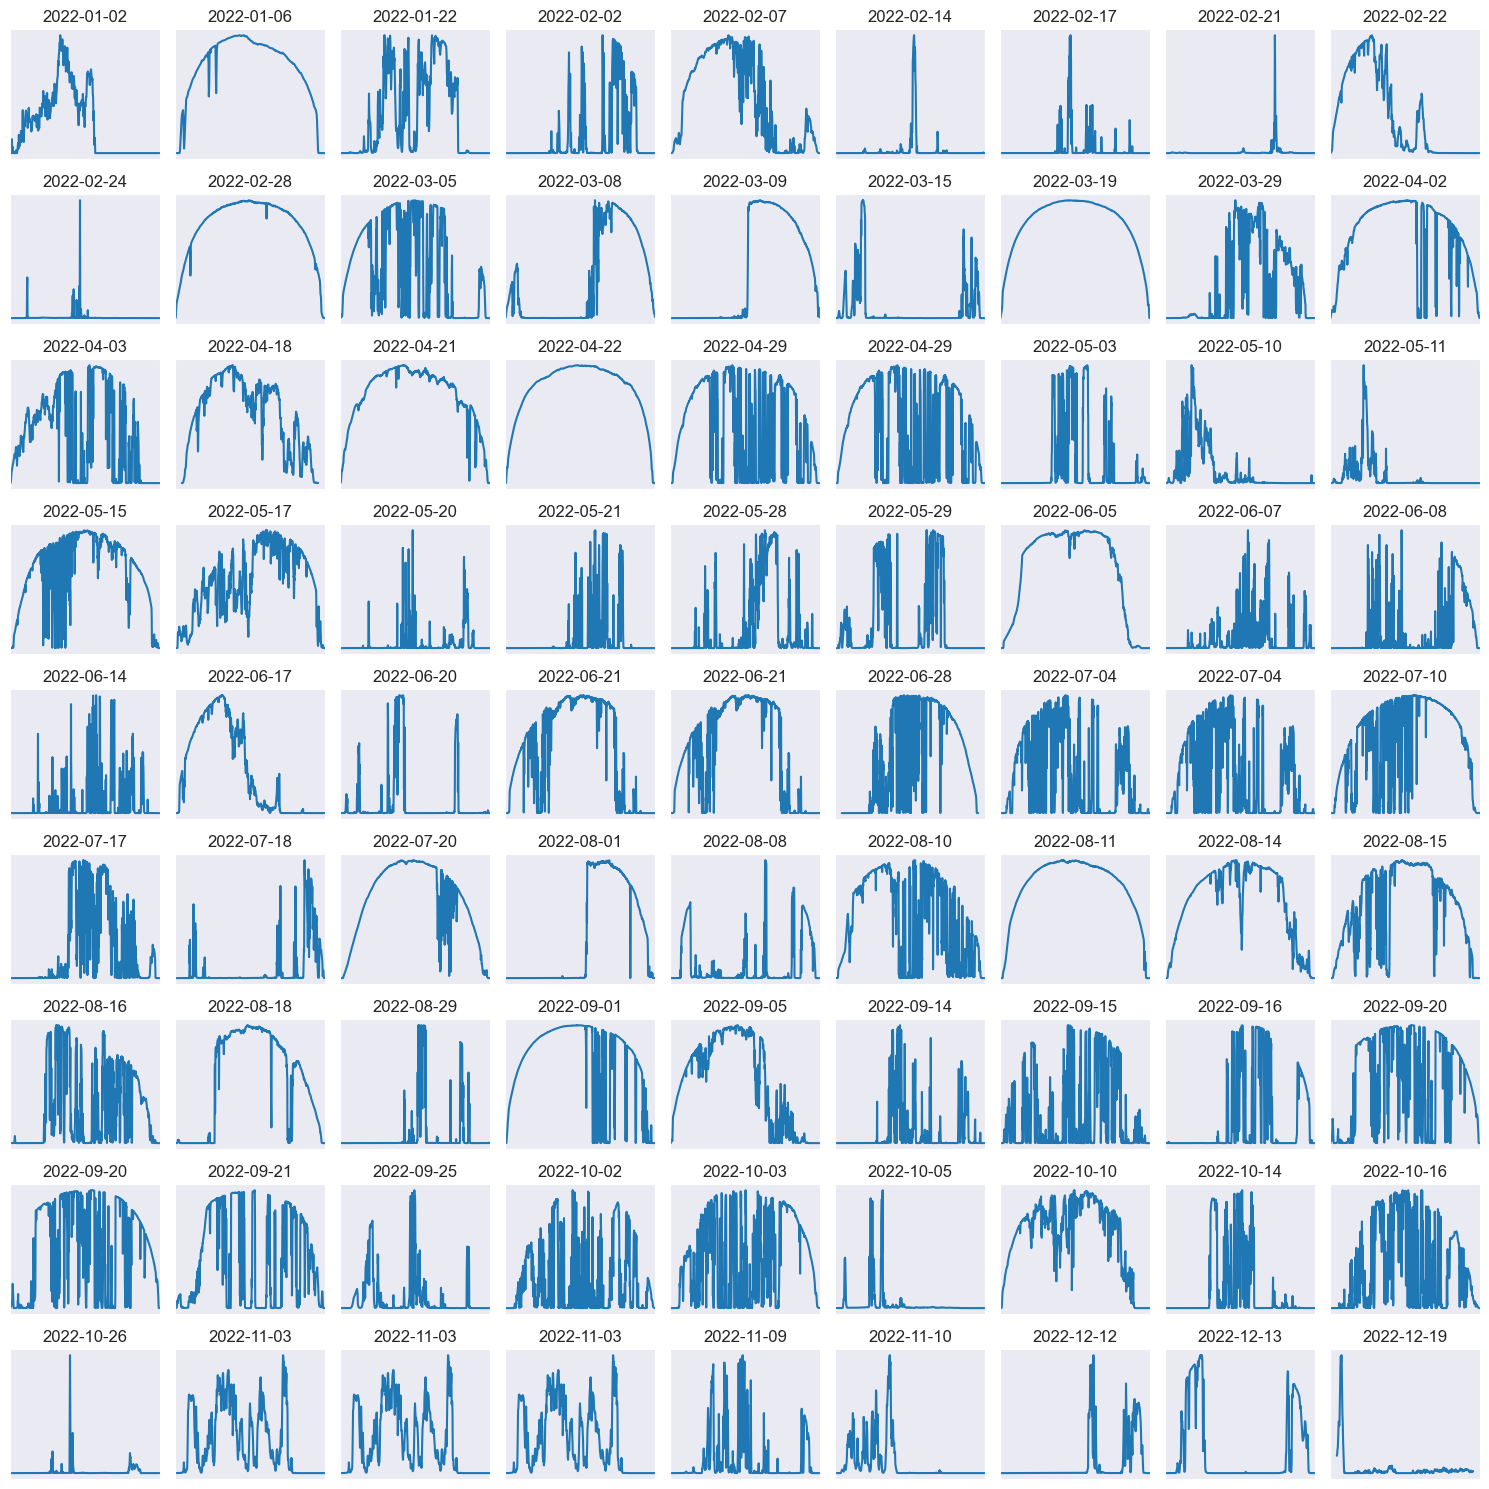

In [41]:
# Generate a large plot with subplots for random dates in the dataset
import random
df_tmp = df.loc['2022']
dates = random.sample(list(df_tmp.index), 81)
# sort the dates
dates = sorted(dates)
fig, axes = plt.subplots(9, 9, figsize=(15, 15))
for i, date in enumerate(dates):
    ax = axes[i // 9, i % 9]

    date_str = date.strftime('%Y-%m-%d')
    ax.set_title(f'{date_str}')
    df_tmp.loc[date_str, 'DNI'].plot(ax=ax)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
               left=False, right=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

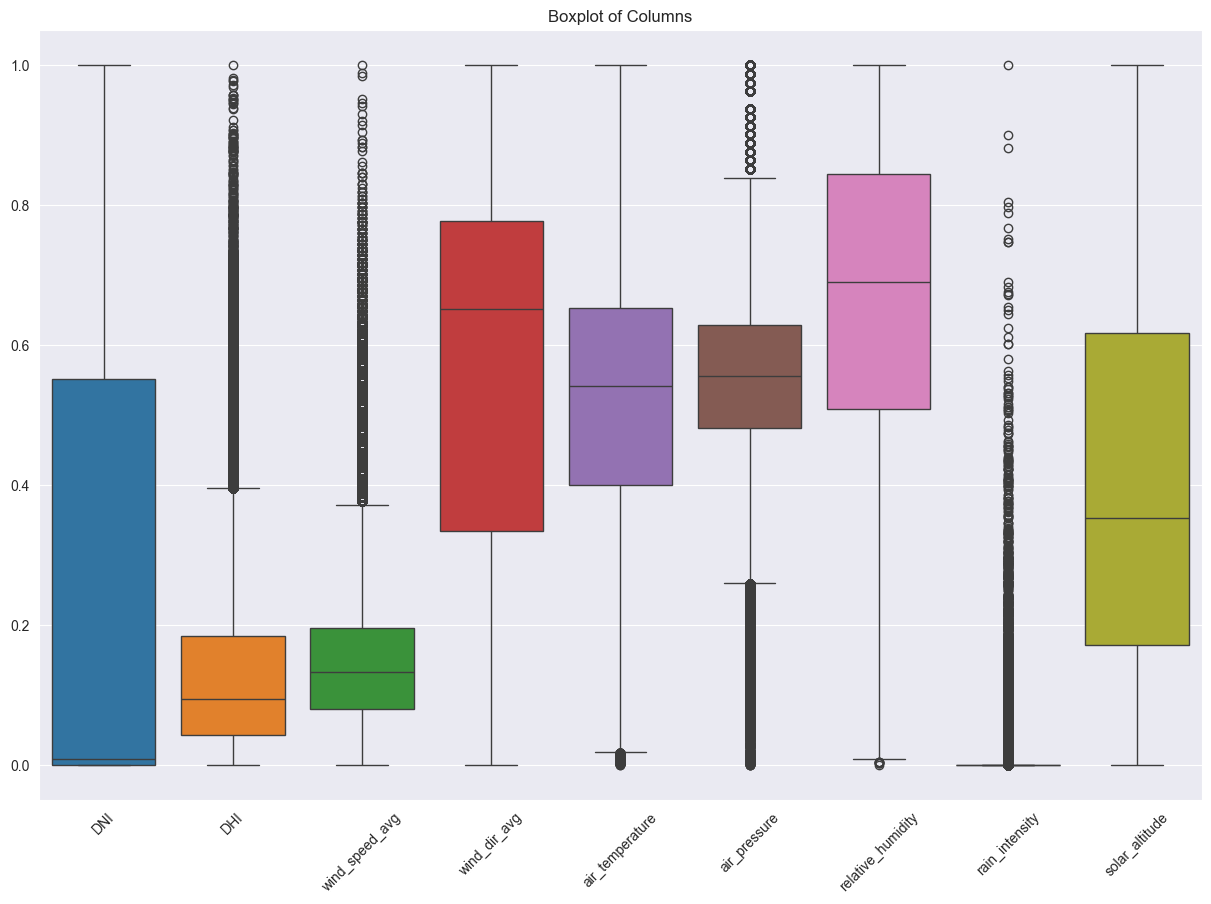

In [43]:
# boxplot of columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()


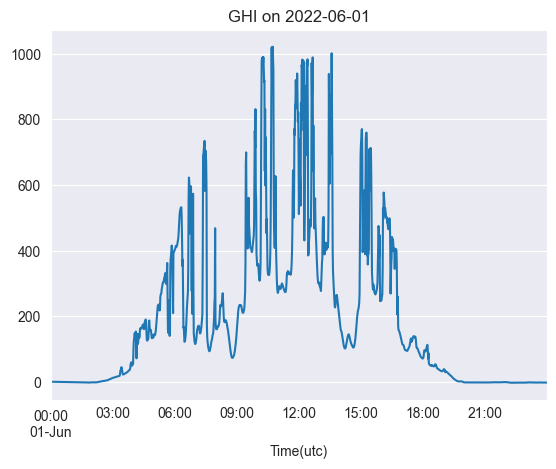

In [16]:
# select random date and plot the GHI
date = '2023-03-01'
df.loc[date, 'GHI'].plot()
plt.title(f'GHI on {date}')
plt.show()